<h1 style="background-color:skyblue;font-family:sans-serif;font-size:320%;text-align:center">Madrid: Data Analysis and Price Prediction</h1>

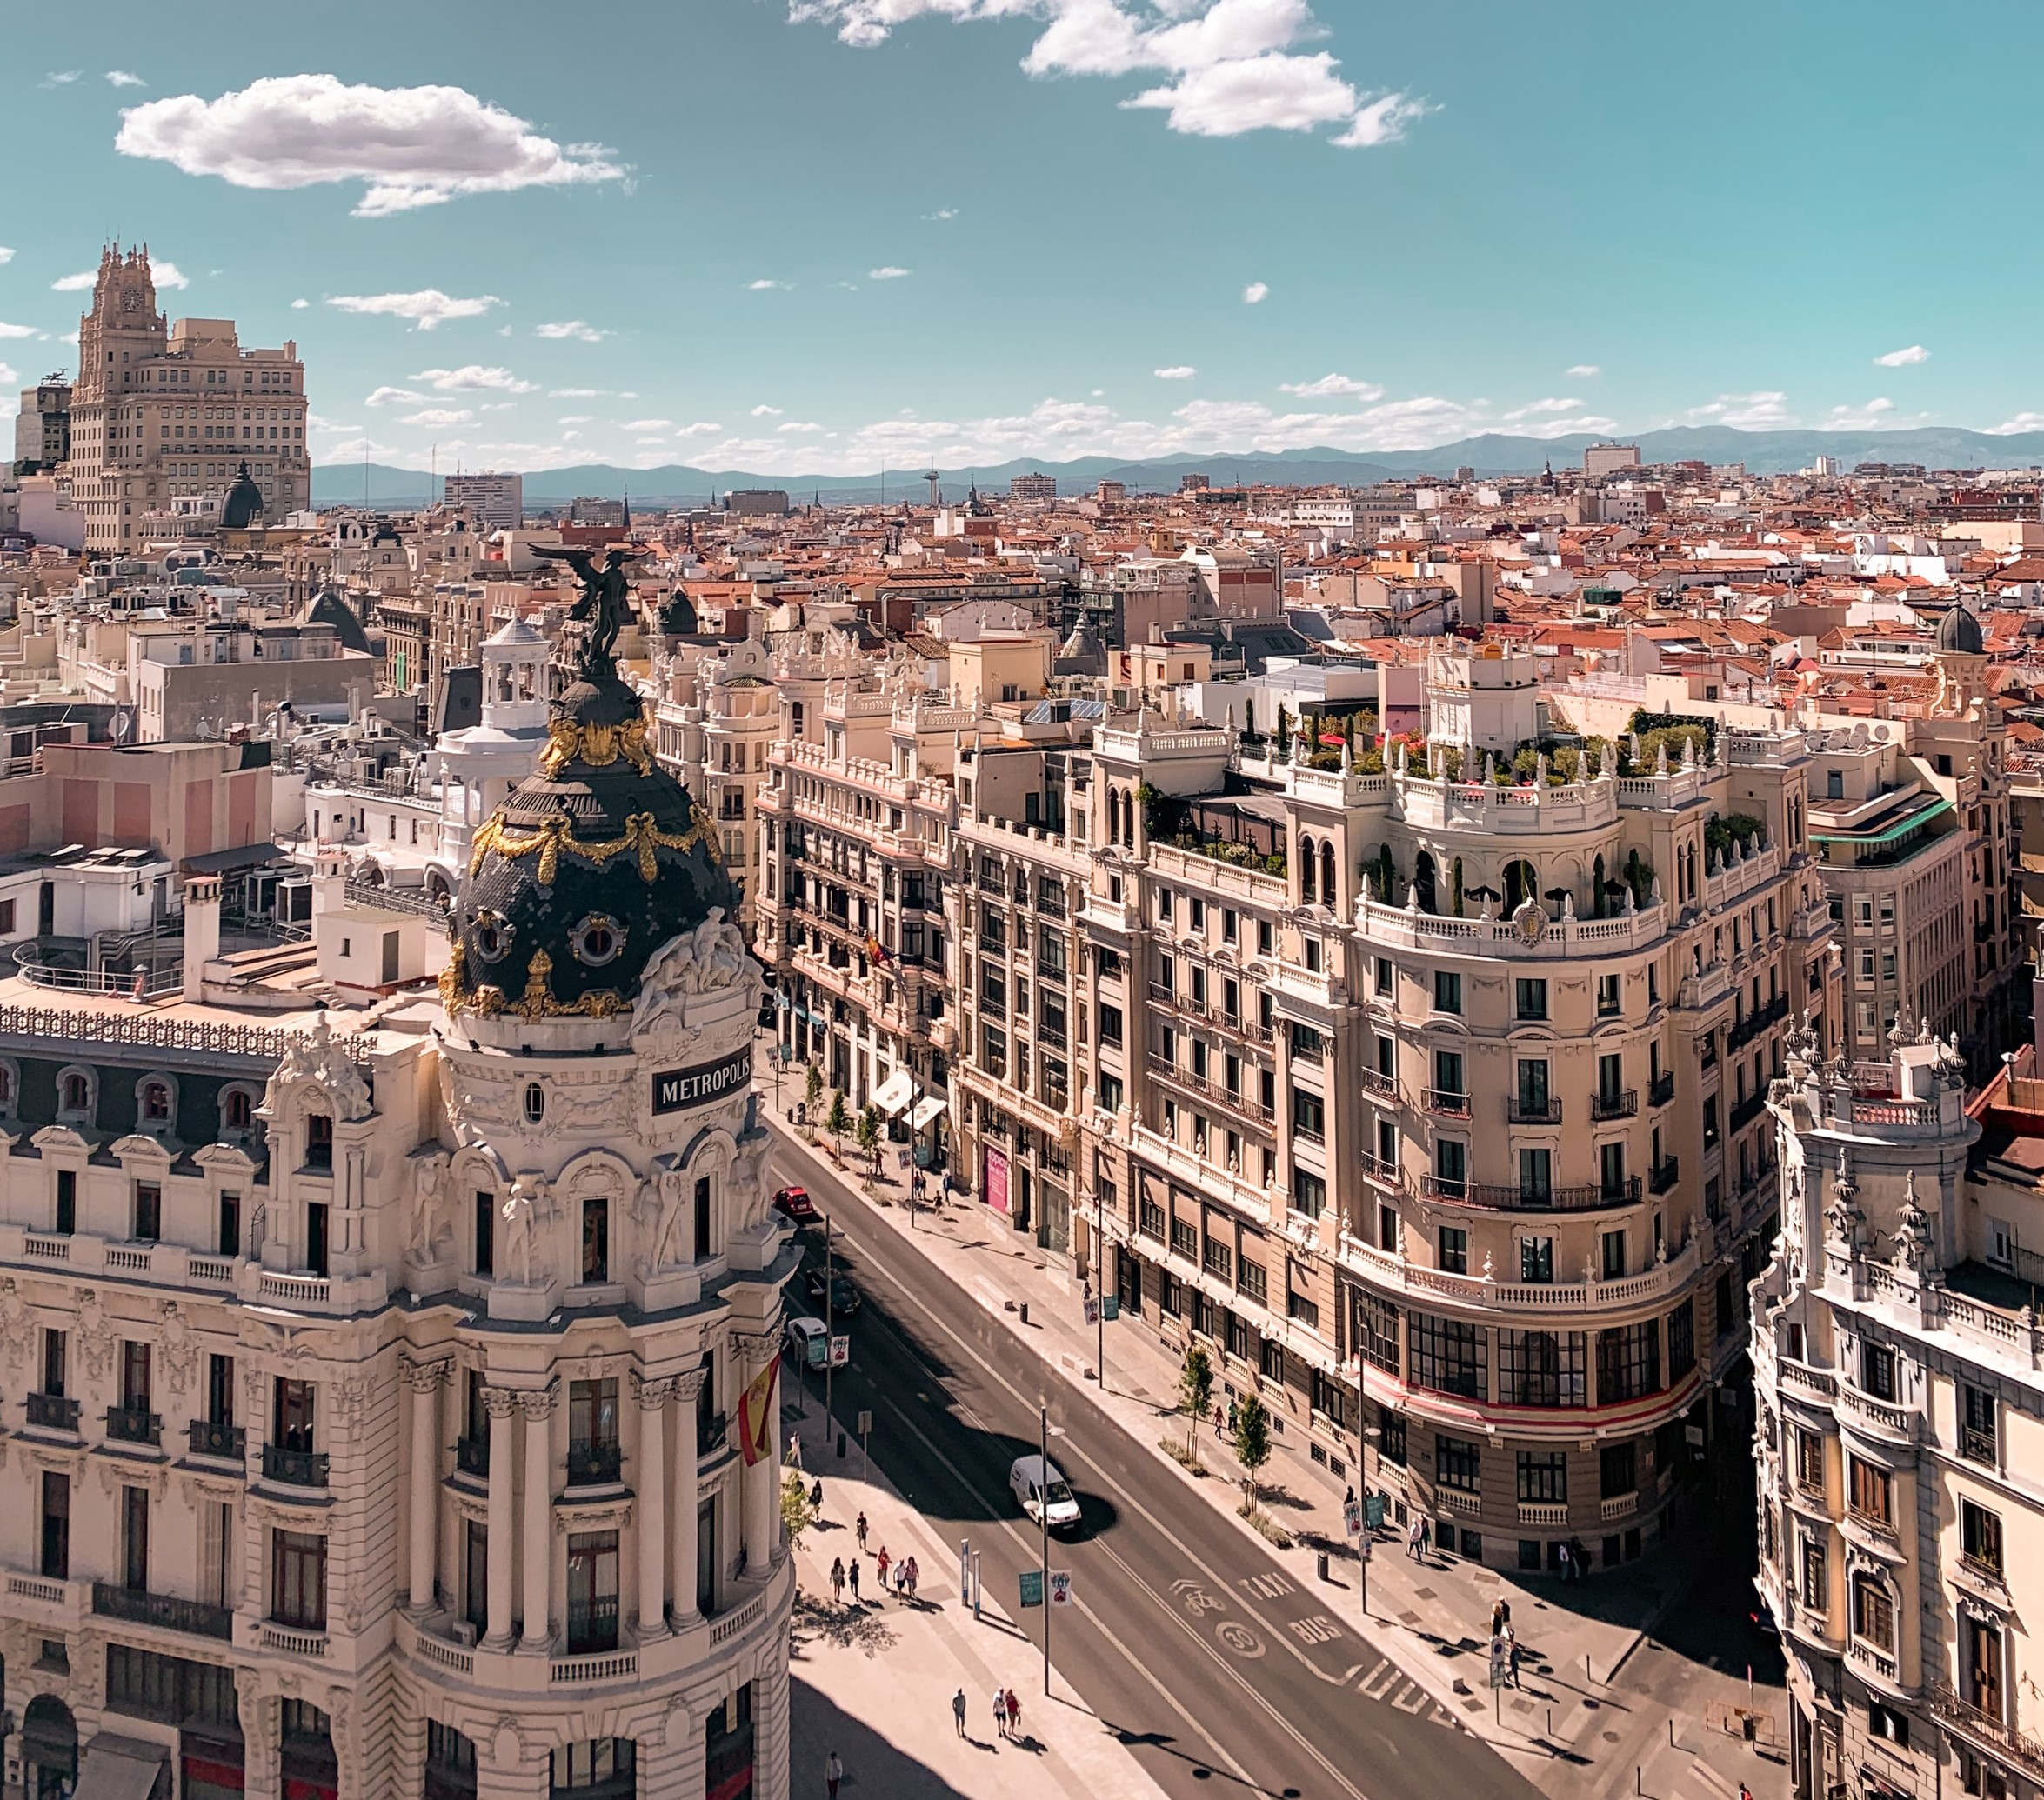

In [46]:
from IPython.display import Image
import os
Image("../input/madridairbnbdata/Madrid.jpg")

<h2 style="background-color:skyblue;font-family:sans-serif;font-size:300%;text-align:center">Table Of Content</h2>

* [1. First Steps](#1)
    * [1.1 Libraries](#1.1)
    * [1.2 Data Exploration](#1.2)
* [2. Data Analysis](#2)
    * [2.1 Price per Room Type](#2.1)
    * [2.2 Room Type Distribution over Districts](#2.2)
    * [2.3 Influence of Reviews on the Price](#2.3)
* [3. Data Preprocessing](#3)    
* [4. Model](#4) 

<a id="1"></a>
<h2 style="background-color:skyblue;font-family:sans-serif;font-size:300%;text-align:center">First Steps</h2>

<a id="1.1"></a>
<h3 style="background-color:skyblue;font-family:sans-serif;font-size:230%;text-align:center">Libraries</h3>

In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/madrid-airbnb-data/calendar.csv
/kaggle/input/madrid-airbnb-data/listings.csv
/kaggle/input/madrid-airbnb-data/listings_detailed.csv
/kaggle/input/madrid-airbnb-data/neighbourhoods.geojson
/kaggle/input/madrid-airbnb-data/reviews.csv
/kaggle/input/madrid-airbnb-data/reviews_detailed.csv
/kaggle/input/madrid-airbnb-data/neighbourhoods.csv
/kaggle/input/madridairbnbdata/Madrid_night.jpg
/kaggle/input/madridairbnbdata/Madrid.jpg


In [48]:
listings = pd.read_csv("/kaggle/input/madrid-airbnb-data/listings.csv")

<a id="1.1"></a>
<h3 style="background-color:skyblue;font-family:sans-serif;font-size:230%;text-align:center">Data Exploration</h3>

In [49]:
listings.shape

(20837, 16)

In [50]:
 listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,2019-07-10,1.19,1,337


In [51]:
listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.083700e+04,2.083700e+04,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,16183.000000,20837.000000,20837.000000
mean,2.356026e+07,1.014144e+08,40.420548,-3.694500,134.065364,4.373614,35.163891,1.958974,12.188559,155.097567
std,1.083667e+07,8.956078e+07,0.021881,0.027793,381.207575,20.428777,61.863053,1.967925,32.156130,133.746263
min,6.369000e+03,5.154000e+03,40.319480,-3.890940,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.608985e+07,2.232182e+07,40.409550,-3.707490,40.000000,1.000000,1.000000,0.430000,1.000000,17.000000
50%,2.459474e+07,7.574288e+07,40.418900,-3.701180,65.000000,2.000000,8.000000,1.280000,2.000000,123.000000
75%,3.401318e+07,1.719263e+08,40.429020,-3.689110,100.000000,3.000000,42.000000,2.940000,7.000000,300.000000
max,3.873002e+07,2.960847e+08,40.573990,-3.527660,9999.000000,1125.000000,594.000000,34.230000,231.000000,365.000000


In [52]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20837 non-null  int64  
 1   name                            20832 non-null  object 
 2   host_id                         20837 non-null  int64  
 3   host_name                       20822 non-null  object 
 4   neighbourhood_group             20837 non-null  object 
 5   neighbourhood                   20837 non-null  object 
 6   latitude                        20837 non-null  float64
 7   longitude                       20837 non-null  float64
 8   room_type                       20837 non-null  object 
 9   price                           20837 non-null  int64  
 10  minimum_nights                  20837 non-null  int64  
 11  number_of_reviews               20837 non-null  int64  
 12  last_review                     

In [53]:
# Is missing data in reviews_per_month 
# connected with a number_of_reviews of null?

sum(listings.number_of_reviews[listings.reviews_per_month == None])

# conlusion: yes

0

In [54]:
# Are there any duplicates in the data?

listings.duplicated().sum()

# conclusion: No

0

Text(0.5, 1.0, 'Are Prices per Night or per Visit?')

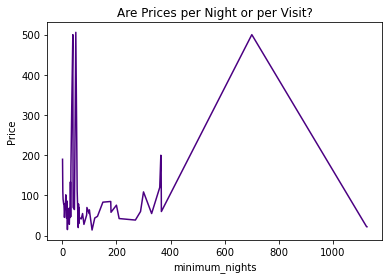

In [55]:
# Check if the price in the data is a price per night or a price per visit

price_per_minimum_nights = listings.groupby(["minimum_nights"]).mean().price
price_per_minimum_nights.plot(kind="line", color="indigo")
plt.ylabel("Price")
plt.title("Are Prices per Night or per Visit?")

# Conclusion: The price seems to be per night

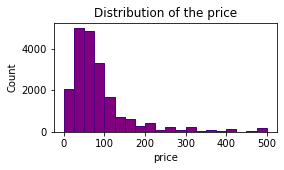

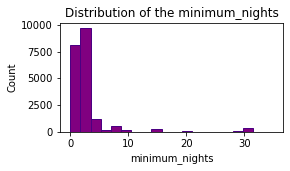

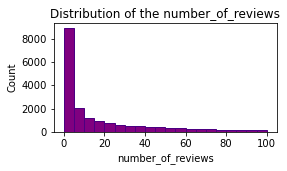

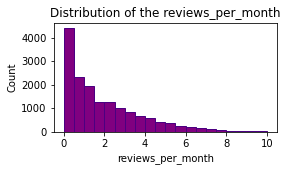

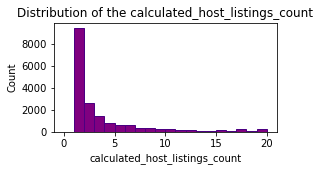

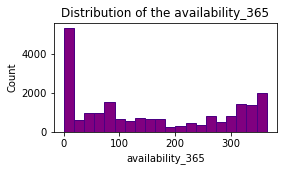

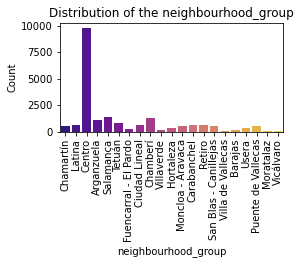

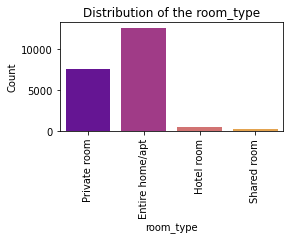

In [56]:
# Take a look at the distributions
def distribution_plot(col, boundaries=(0, 100), data_type="numeric", rot=0):
    plt.figure(figsize=(4,2))
    if data_type == "numeric":
        listings[col].hist(range=boundaries, bins=20, color="purple", edgecolor="indigo", 
                       linewidth=1)
    else:
        sns.countplot(listings[col], palette="plasma")
        
    plt.grid(False)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title("Distribution of the " + col)
    plt.xticks(rotation=rot)
    plt.show()



distribution_plot("price", boundaries=(0, 500))
distribution_plot("minimum_nights", boundaries=(0, 35))
distribution_plot("number_of_reviews", boundaries=(0, 100))
distribution_plot("reviews_per_month", boundaries=(0, 10))
distribution_plot("calculated_host_listings_count", boundaries=(0, 20))
distribution_plot("availability_365", boundaries=(0, 365))
distribution_plot("neighbourhood_group", data_type="not numeric", rot=90)
distribution_plot("room_type", data_type="not numeric", rot=90)

<a id="1.1"></a>
<h2 style="background-color:skyblue;font-family:sans-serif;font-size:300%;text-align:center">Data Analysis</h2>

Before (further) preprocessing the data for modeling, we can already execute a data analysis.

<a id="1.1"></a>
<h3 style="background-color:skyblue;font-family:sans-serif;font-size:230%;text-align:center">Price per Room Type</h3>

In [57]:
#For which room type can I take which price?
price_per_room_type = listings.groupby(["room_type"]).mean().price 
price_per_room_type.sort_values(ascending=False)

room_type
Hotel room         228.897275
Entire home/apt    153.266232
Private room        97.706651
Shared room         82.824818
Name: price, dtype: float64

Text(0.5, 1.0, 'Which price can I take for my room type?')

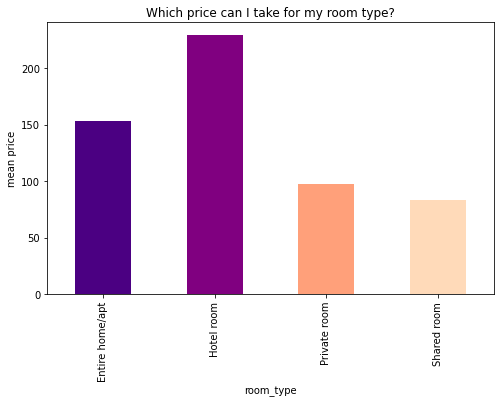

In [58]:
plt.figure(figsize=(8,5))
price_per_room_type.plot(kind="bar", color=["indigo", "purple", "lightsalmon", "peachpuff"]);
plt.ylabel("mean price")
plt.title("Which price can I take for my room type?")

<a id="1.1"></a>
<h3 style="background-color:skyblue;font-family:sans-serif;font-size:230%;text-align:center">Room Type Distribution over Districts</h3>

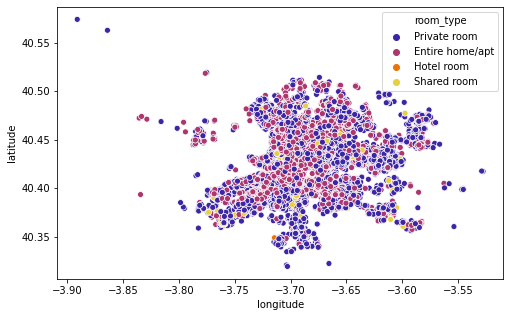

In [59]:
# Is there a gap in the market for a room_type in any district

plt.figure(figsize=(8,5))
sns.scatterplot(listings.longitude, listings.latitude, hue=listings.room_type, 
                palette="CMRmap")

# The whole city seems to be well covered.
# There are fewer private rooms in the center than in the outer parts.
# Shared rooms and hotel rooms are not very common. This could correspond to a lower demand. 

<a id="1.1"></a>
<h3 style="background-color:skyblue;font-family:sans-serif;font-size:230%;text-align:center">Influence of Reviews on the Price</h3>

In [60]:
# Can flats with at least one review take higher prices?
price_per_number_of_reviews = listings.groupby(["number_of_reviews"]).mean().price
price_per_number_of_reviews.sort_values(ascending=False)

# Answer: They surprisingly do not.
# Possible reason 1: Cheaper apartments are booked more often and therefore get more reviews.
# Possible reason 2: Apartments with more reviews are older (older furniture) 
#                    and therefore less attractive.
# Possible reason 3: Rewiews must not always be good. Former guests could have complained.

number_of_reviews
0      260.534164
42     167.666667
1      166.411050
237    162.500000
338    140.000000
          ...    
426     23.000000
312     20.000000
316     20.000000
248     19.000000
296     18.000000
Name: price, Length: 418, dtype: float64

Text(0, 0.5, 'Price')

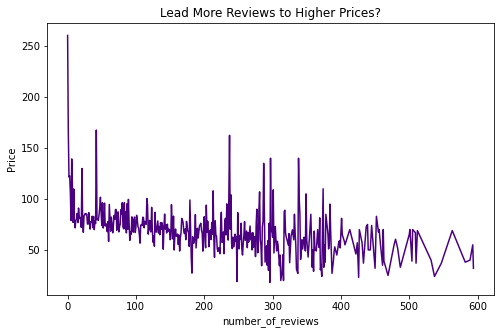

In [61]:
plt.figure(figsize=(8,5))
price_per_number_of_reviews.plot(kind="line", color="indigo")
plt.title("Lead More Reviews to Higher Prices?")
plt.ylabel("Price")


<a id="1.1"></a>
<h2 style="background-color:skyblue;font-family:sans-serif;font-size:300%;text-align:center">Data Preprocessing</h2>

In [62]:
# Create a new column that counts the days since the last review
# Missing values mean that there has not been a review yet. They receive a high number.

listings["last_review"] = listings["last_review"].fillna("2015-01-01")
listings["last_review"] = pd.to_datetime(listings["last_review"])
listings["days_since_last_review"] = (datetime.now() - listings["last_review"]).dt.days

Text(0.5, 1.0, 'Distribution of the Days since the last Review')

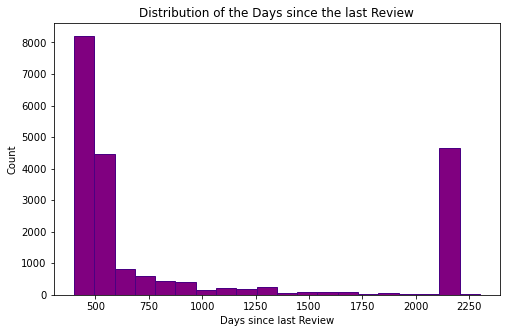

In [63]:
# Distribution of the days_since_last_review 
# The right bin represents listings without any review

plt.figure(figsize=(8,5))
listings["days_since_last_review"].hist(range=(400,2300), bins=20, color="purple",
                                        edgecolor="indigo", linewidth=1)
plt.grid(False)
plt.xlabel("Days since last Review")
plt.ylabel("Count")
plt.title("Distribution of the Days since the last Review")

In [64]:
# Fill missing values in reviews_per_month
listings["reviews_per_month"] = listings["reviews_per_month"].fillna(0)

In [65]:
# Delete columns we do not need:
listings_slim = listings.drop(["id", "name", "host_name", "last_review", "neighbourhood_group", "neighbourhood"], axis=1)

# With latitude and longitude we still have location information in the data.  
# ID would be a relatively important feature in the model. Nevertheless I drop it, because
# there is no solid reason for this.

In [66]:
# Get rid of outliers

cols = ["price", "minimum_nights", "calculated_host_listings_count",
        "reviews_per_month", "number_of_reviews"]

for col in cols:
    upper_bound = listings_slim[col].quantile(0.95)
    lower_bound = listings_slim[col].quantile(0.05)
    listings = listings[listings[col] < upper_bound]
    listings = listings[listings[col] > lower_bound]

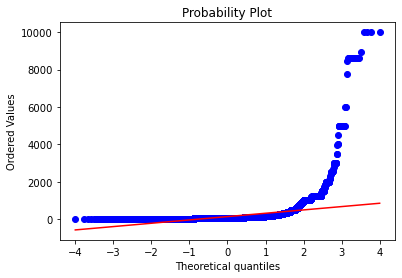

In [67]:
# Plot before transformation
stats.probplot(listings_slim["price"], plot=plt)

# Power Transformer
numeric_cols = list(listings_slim._get_numeric_data().columns)
pt = PowerTransformer(method="yeo-johnson")
listings_slim[numeric_cols] = pt.fit_transform(listings_slim[numeric_cols])

((array([-3.98836833, -3.77270258, -3.65471266, ...,  3.65471266,
          3.77270258,  3.98836833]),
  array([-3.43507259, -3.43507259, -3.18647666, ...,  3.03352376,
          3.03352376,  3.03352376])),
 (0.9964098009329051, -3.069467925171087e-16, 0.9962264435759778))

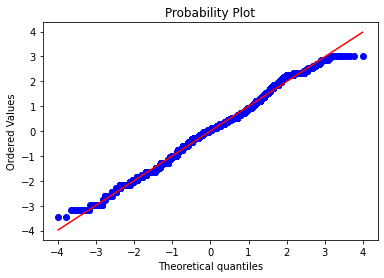

In [68]:
# After transformation
stats.probplot(listings_slim["price"], plot=plt)

In [69]:
# Restructure categorial data:
listings_preprocessed = pd.get_dummies(listings_slim,drop_first=True)
listings_preprocessed.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-2.345771,1.634983,0.716598,0.141286,-1.100530,1.099221,-0.253291,-0.941087,-0.365005,-0.899987,0,1,0
1,-2.225458,-0.784792,-2.033700,-1.950156,1.145773,0.760995,-0.265526,-0.170009,-0.418740,0.738767,0,1,0
2,-2.207669,0.065399,-0.276924,0.295893,1.364767,-0.622760,-1.147327,-0.941087,1.156744,1.169103,0,0,0
3,-2.207499,-0.021800,-0.020989,0.684114,0.802875,1.091615,-0.171022,-0.941087,0.981510,-0.467833,0,0,0
4,-2.196166,-1.406085,0.269351,-1.292092,0.199480,1.453588,0.330030,-0.941087,1.102469,-0.486932,0,1,0


In [70]:
listings_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         20837 non-null  float64
 1   latitude                        20837 non-null  float64
 2   longitude                       20837 non-null  float64
 3   price                           20837 non-null  float64
 4   minimum_nights                  20837 non-null  float64
 5   number_of_reviews               20837 non-null  float64
 6   reviews_per_month               20837 non-null  float64
 7   calculated_host_listings_count  20837 non-null  float64
 8   availability_365                20837 non-null  float64
 9   days_since_last_review          20837 non-null  float64
 10  room_type_Hotel room            20837 non-null  uint8  
 11  room_type_Private room          20837 non-null  uint8  
 12  room_type_Shared room           

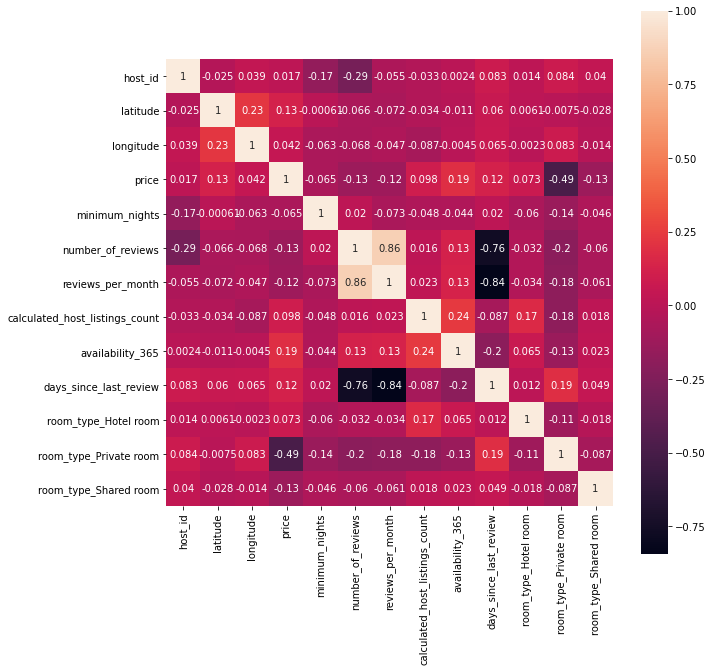

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(listings_preprocessed.corr(), square=True, annot=True)

# Conclusion: Most of the features do not correlate strongly with the price.

<a id="1.1"></a>
<h2 style="background-color:skyblue;font-family:sans-serif;font-size:300%;text-align:center">Model</h2>

In [72]:
# Split into explanatory and response variables
X = listings_preprocessed.drop(["price"], axis = 1)
y = listings_preprocessed["price"]

In [73]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Cross valiation to find the best estimator and its most suitable parameters

estimators = [Ridge(), Lasso(), RandomForestRegressor()]

params = [{"alpha": [0.1, 0.5, 1, 5, 10, 20],
           "tol": [0.1, 0.5, 0.9]},
             
          {"alpha": [0.1, 0.5, 1, 5, 10, 20],
           "max_iter": [1000, 2000]},
             
          {"max_depth": [21, 22, 23, 24, 25], 
           "min_samples_split": [5, 6, 7, 8, 9, 10]}]
    
for estimator, param in zip(estimators, params):
        
    estimators_cv = GridSearchCV(estimator, param_grid=param, cv=5).fit(X_train, y_train)

    print(estimators_cv .best_estimator_)
    print(estimators_cv .best_score_)
    print(estimators_cv .best_params_)

Ridge(alpha=1, tol=0.1)
0.3932919554167215
{'alpha': 1, 'tol': 0.1}
Lasso(alpha=0.1)
0.25283627911725315
{'alpha': 0.1, 'max_iter': 1000}
RandomForestRegressor(max_depth=25, min_samples_split=5)
0.6180390943755791
{'max_depth': 25, 'min_samples_split': 5}


In [75]:
rf = RandomForestRegressor(n_estimators=500, max_depth=25, min_samples_split=5)
rf.fit(X_train, y_train) 

y_pred = rf.predict(X_test)

print("Trainscore R^2: {}".format(rf.score(X_train, y_train))) 
print("Testscore R^2: {}".format(rf.score(X_test, y_test))) 
rmse = np.sqrt(mean_squared_error(y_test,y_pred)) 
print("Testdata Root Mean Squared Error: {}".format(rmse))

Trainscore R^2: 0.9211929773208931
Testscore R^2: 0.6461874768578862
Testdata Root Mean Squared Error: 0.5878541102761171


Text(0.5, 1.0, 'Feature Importance')

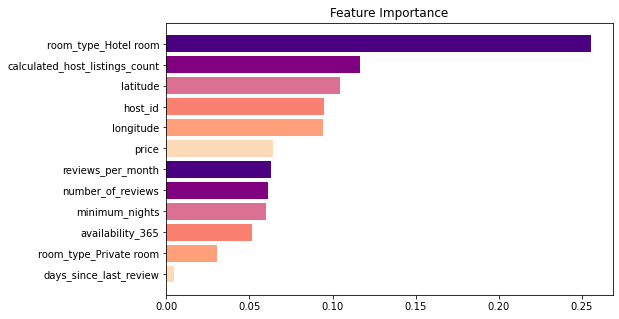

In [76]:
feature_importance = pd.Series(rf.feature_importances_, index = X.columns)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(8,5))
plt.barh(pos, feature_importance[sorted_idx], align="center",
         color=["peachpuff", "lightsalmon", "salmon", "palevioletred", "purple", "indigo"])
plt.yticks(pos, np.array(listings_preprocessed.columns)[sorted_idx])
plt.title("Feature Importance")